1. Preprocessing the data (5 points)
a. Import required libraries and read all the 3 csvs.
b. Analyze each csv by checking a few samples, drop duplicates.
c. Check distribution of important features like gender, age group, etc.
d. Merge the 3 csv into a single dataframe.

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 

In [2]:
events_df = pd.read_csv("events.csv")
gender_age_df = pd.read_csv("gender_age.csv")
phone_device_df = pd.read_csv("phone_device.csv")

In [3]:
events_df.dtypes

event_id       int64
device_id      int64
timestamp     object
longitude    float64
latitude     float64
dtype: object

In [4]:
events_df.shape

(3252950, 5)

In [5]:
events_df.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [6]:
events_df.isnull().values.any() 

False

In [7]:
gender_age_df.dtypes

device_id     int64
gender       object
age           int64
group        object
dtype: object

In [8]:
gender_age_df.shape

(74645, 4)

In [9]:
gender_age_df.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [10]:
gender_age_df.isnull().values.any() 

False

In [11]:
phone_device_df.dtypes

device_id        int64
phone_brand     object
device_model    object
dtype: object

In [12]:
phone_device_df.shape

(187245, 3)

In [13]:
phone_device_df.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [14]:
phone_device_df.isnull().values.any() 

False

In [15]:
events_df.drop_duplicates()
gender_age_df.drop_duplicates()
phone_device_df.drop_duplicates()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2
...,...,...,...
187239,3210973037848940984,小米,MI 2S
187240,7979541072208733273,小米,MI 4
187241,-187404680852357705,小米,红米2
187242,-2718274279595622821,小米,MI 3


In [16]:
for feature in gender_age_df.columns: # Loop through all columns in the dataframe
    if gender_age_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        gender_age_df[feature] = pd.Categorical(gender_age_df[feature]).codes # Replace strings with an integer

In [17]:
gender_age_df.dtypes

device_id    int64
gender        int8
age          int64
group         int8
dtype: object

In [18]:
gender_age_df.head()

,device_id,gender,age,group
0,-8076087639492063270,1,35,10
1,-2897161552818060146,1,35,10
2,-8260683887967679142,1,35,10
3,-4938849341048082022,1,30,9
4,245133531816851882,1,30,9


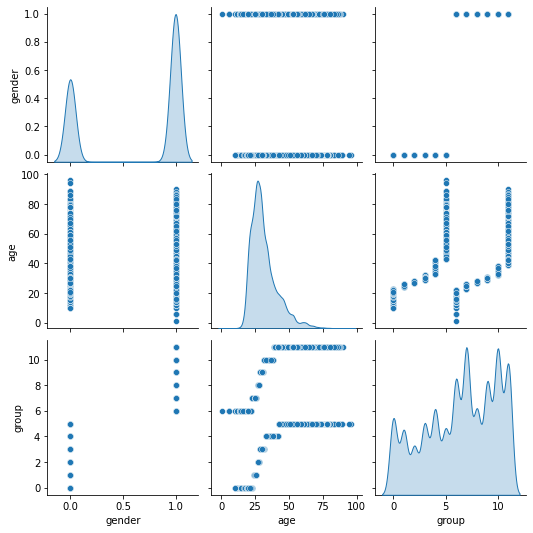

In [19]:
genderAgeAttr=gender_age_df.iloc[:,1:]
sns.pairplot(genderAgeAttr,diag_kind='kde')

Two Genders and around 20 age groups can be observed from the above
Highest number of people are from 25-26 ages

In [20]:
df = events_df.merge(gender_age_df,on='device_id').merge(phone_device_df,on='device_id')

2. Exploratory Data Analysis (10 points)
a. Check dimensions of the dataframe in terms of rows and columns and
study few of the variables
b. Check the data types
c. Check the frequency and distribution of the relevant features
d. Convert string features (phone_brand, device_model and gender ) into
categories and make them numerical
e. Study summary statistics and mention your findings
f. Check for missing values and impute/drop missing values if any
g. Drop irrelevant columns like 'timestamp','event_id','device_id'
h. Standardize the data to bring relevant features into a scale

In [21]:
df.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,1,46,11,小米,红米note
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,1,46,11,小米,红米note
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,1,46,11,小米,红米note
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,1,46,11,小米,红米note
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,1,46,11,小米,红米note


In [22]:
df.shape

(1220474, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220474 entries, 0 to 1220473
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   event_id      1220474 non-null  int64  
 1   device_id     1220474 non-null  int64  
 2   timestamp     1220474 non-null  object 
 3   longitude     1220474 non-null  float64
 4   latitude      1220474 non-null  float64
 5   gender        1220474 non-null  int8   
 6   age           1220474 non-null  int64  
 7   group         1220474 non-null  int8   
 8   phone_brand   1220474 non-null  object 
 9   device_model  1220474 non-null  object 
dtypes: float64(2), int64(3), int8(2), object(3)
memory usage: 86.1+ MB


In [24]:
df.describe()

,event_id,device_id,longitude,latitude,gender,age,group
count,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06
mean,1.626750e+06,-3.113463e+16,7.841065e+01,2.183423e+01,7.116432e-01,3.348649e+01,7.282124e+00
std,9.396839e+05,5.320454e+18,5.381275e+01,1.564637e+01,4.529982e-01,9.738525e+00,3.236179e+00
min,1.000000e+00,-9.222957e+18,-1.800000e+02,-3.380000e+01,0.000000e+00,1.100000e+01,0.000000e+00
25%,8.123500e+05,-4.667940e+18,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,5.000000e+00
50%,1.627414e+06,-1.250469e+17,1.127700e+02,2.857000e+01,1.000000e+00,3.100000e+01,8.000000e+00
75%,2.440480e+06,4.631837e+18,1.171600e+02,3.408000e+01,1.000000e+00,3.900000e+01,1.000000e+01
max,3.252948e+06,9.220915e+18,1.511800e+02,5.364000e+01,1.000000e+00,8.900000e+01,1.100000e+01


In [25]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer

In [26]:
#dropping/ignoring 'timestamp','event_id','device_id'
df = df.drop(['timestamp','event_id','device_id'], axis=1)

In [27]:
df.head()

,longitude,latitude,gender,age,group,phone_brand,device_model
0,121.38,31.24,1,46,11,34,864
1,121.38,31.24,1,46,11,34,864
2,121.39,31.23,1,46,11,34,864
3,121.38,31.24,1,46,11,34,864
4,121.16,31.00,1,46,11,34,864


In [28]:
pd.DataFrame( df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
longitude,0
latitude,0
gender,0
age,0
group,0
phone_brand,0
device_model,0


In [29]:
df.isnull().values.any() 

False

In [30]:
df.describe()

,longitude,latitude,gender,age,group,phone_brand,device_model
count,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06
mean,7.841065e+01,2.183423e+01,7.116432e-01,3.348649e+01,7.282124e+00,2.838050e+01,6.131640e+02
std,5.381275e+01,1.564637e+01,4.529982e-01,9.738525e+00,3.236179e+00,2.453457e+01,2.693408e+02
min,-1.800000e+02,-3.380000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,5.000000e+00,1.000000e+01,4.060000e+02
50%,1.127700e+02,2.857000e+01,1.000000e+00,3.100000e+01,8.000000e+00,2.100000e+01,6.850000e+02
75%,1.171600e+02,3.408000e+01,1.000000e+00,3.900000e+01,1.000000e+01,3.400000e+01,8.780000e+02
max,1.511800e+02,5.364000e+01,1.000000e+00,8.900000e+01,1.100000e+01,8.800000e+01,9.250000e+02


31 is median age, mean is 34

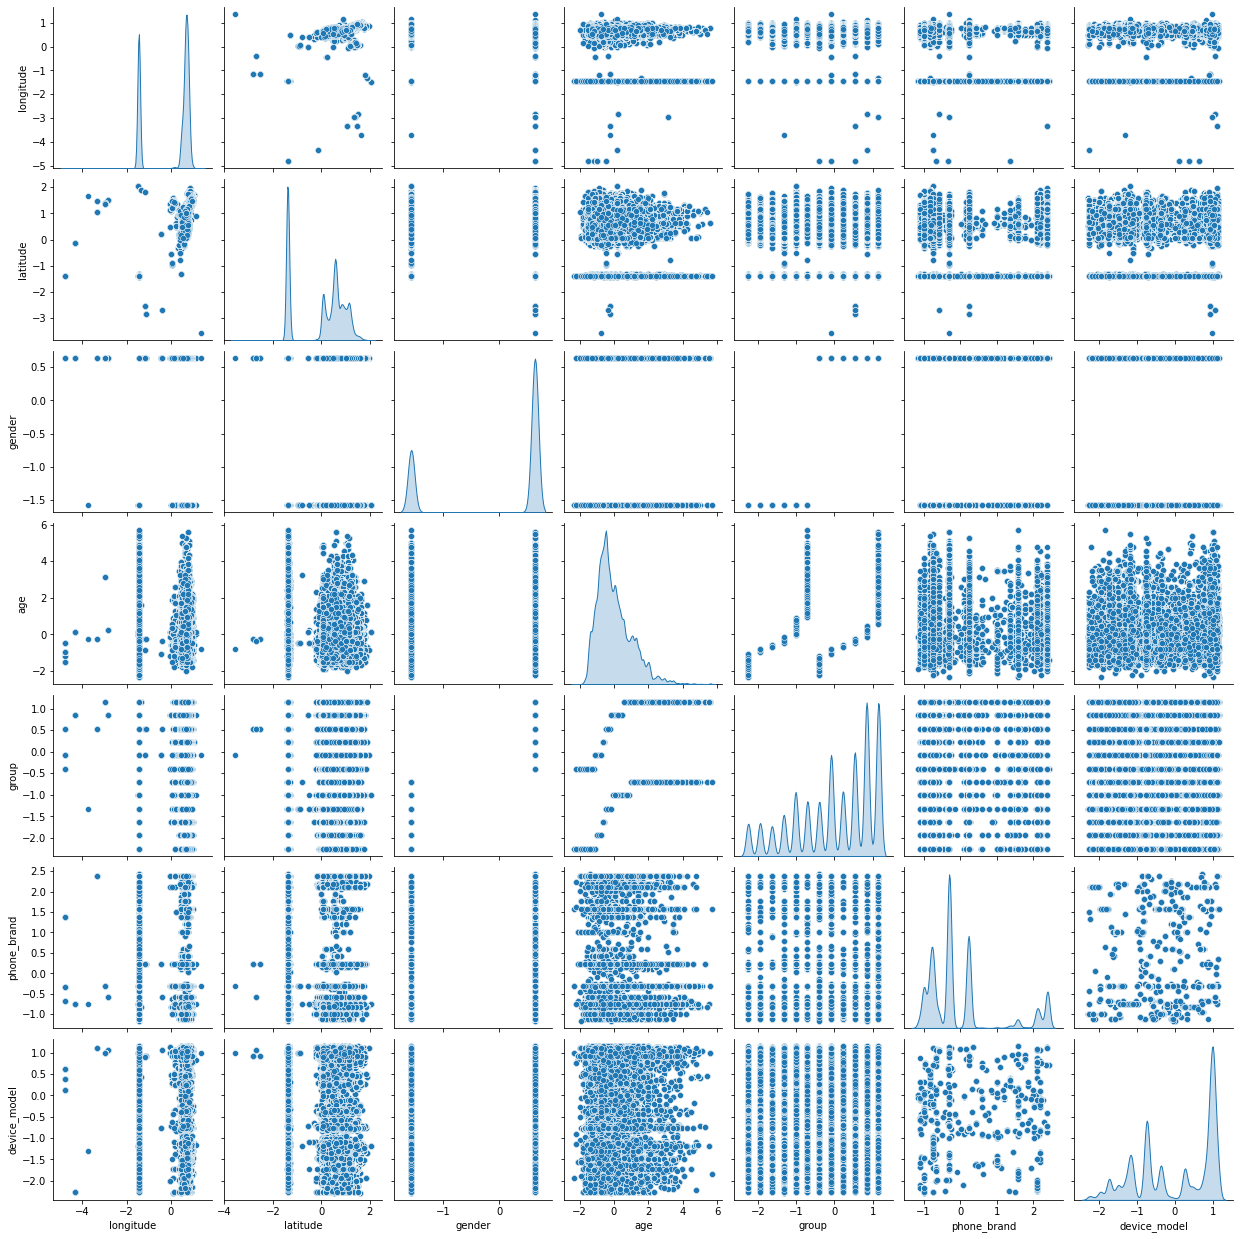

In [31]:
dfScaled=df.apply(zscore)
sns.pairplot(dfScaled,diag_kind='kde')

Can infer that there are many brands and models, 2 distributions of longitudes, 12 age groups from the numberof peaks

3. Build a clustering algorithm for clustering mobile users. Kindly follow the below
steps: (10 points) [ Hint - you can try both k-means and hierarchical clustering]
a. Sample only 20000 data points from the standardized dataframe(you can
take lesser/higher number of features depending on your computer)
b. Apply K-means or hierarchical clustering to the standardized dataframe
c. Mention the hyperparameters that perform the best ( for eg: if you’re using
K-means , you can find K value that gives best silhouette score)
d. Evaluate the clustering algorithm you’ve used

In [32]:
sample1 = dfScaled.sample(n = 10000)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

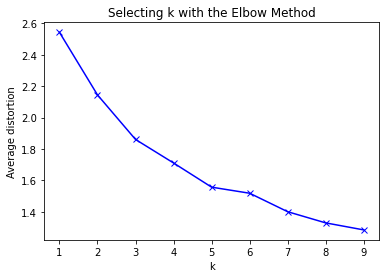

In [33]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(sample1)
    prediction=model.predict(sample1)
    meanDistortions.append(sum(np.min(cdist(sample1, model.cluster_centers_, 'euclidean'), axis=1)) / sample1.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [34]:
sample2 = dfScaled.sample(n = 10000)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

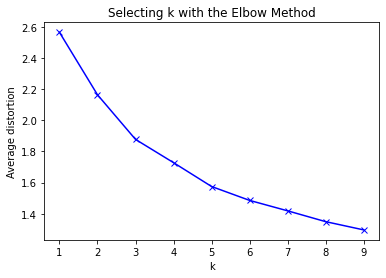

In [35]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(sample2)
    prediction=model.predict(sample2)
    meanDistortions.append(sum(np.min(cdist(sample2, model.cluster_centers_, 'euclidean'), axis=1)) / sample2.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [36]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction 
df["GROUP"] = prediction
dfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,longitude,latitude,gender,age,group,phone_brand,device_model,GROUP
0,121.38,31.24,1,46,11,34,864,0
1,121.38,31.24,1,46,11,34,864,0
2,121.39,31.23,1,46,11,34,864,0
3,121.38,31.24,1,46,11,34,864,0
4,121.16,31.00,1,46,11,34,864,0


In [37]:
dfClust = df.groupby(['GROUP'])
dfClust.mean()

,longitude,latitude,gender,age,group,phone_brand,device_model
GROUP,,,,,,,
0,115.035489,31.708148,1.0,33.296830,9.047411,28.565608,846.838342
1,115.149356,32.691378,0.0,34.071672,2.934939,25.278455,617.790314
2,-0.133884,0.108140,1.0,33.308002,9.036576,33.036921,591.385466
3,114.529016,31.609837,1.0,33.195457,9.060791,26.072192,347.173003
4,0.101628,0.086087,0.0,33.933388,2.903476,28.582796,561.555025


array([[<AxesSubplot:title={'center':'age'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'device_model'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'gender'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'group'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'latitude'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'longitude'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'phone_brand'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

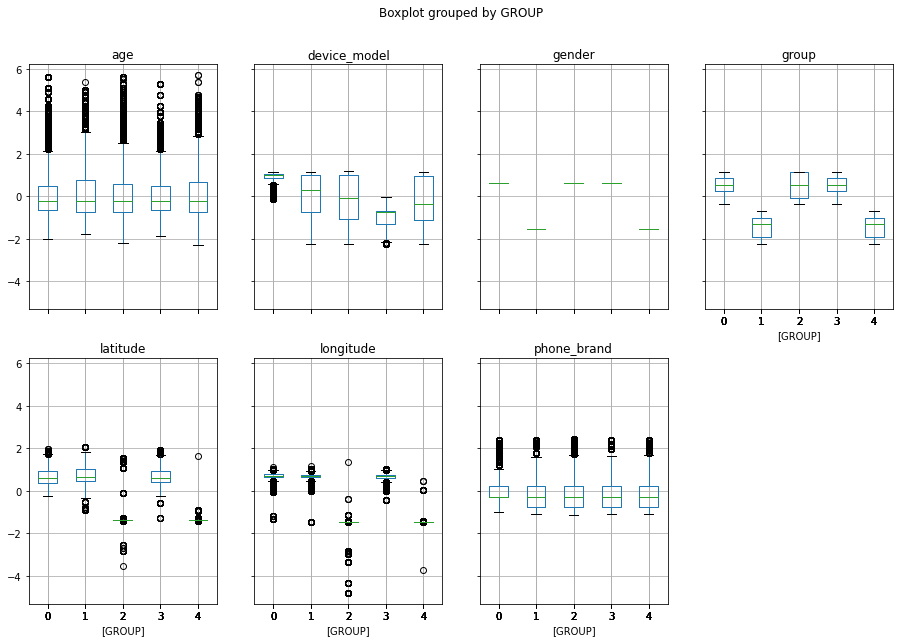

In [38]:
dfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [39]:
#dropping/ignoring 'GROUP'
df = df.drop(['GROUP'], axis=1)
dfScaled = dfScaled.drop(['GROUP'], axis=1)

In [40]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [41]:
sample3 = dfScaled.sample(n = 10000)

In [42]:
model.fit(sample3)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [43]:
sample3['labels'] = model.labels_
sample3.head(10)

,longitude,latitude,gender,age,group,phone_brand,device_model,labels
449409,0.668045,0.558326,0.636552,0.360784,0.839841,2.389262,1.128073,0
671411,0.640914,0.545543,0.636552,-0.460696,0.530835,2.103950,0.786499,0
23376,-1.457102,-1.395483,-1.570963,4.673554,-0.705191,-0.749168,-1.262951,0
1025048,-1.457102,-1.395483,0.636552,-0.358011,0.530835,-0.993721,-0.353322,0
974045,-1.457102,-1.395483,-1.570963,-0.768751,-1.941217,-0.749168,-1.177557,0
1071418,-1.457102,-1.395483,0.636552,-1.384861,-0.396185,0.229044,0.931297,0
917328,0.521797,0.495692,-1.570963,-0.152641,-1.323204,1.370291,0.370668,0
179696,-1.457102,-1.395483,0.636552,-0.768751,-0.087178,-0.300821,-0.694897,0
396227,0.476827,0.563439,-1.570963,-0.460696,-1.323204,-0.749168,-1.210972,0
657710,-1.457102,-1.395483,0.636552,1.695689,1.148848,1.574085,-1.767888,0


In [44]:
sample3Clust = sample3.groupby(['labels'])

In [45]:
sample3Clust.mean()

,longitude,latitude,gender,age,group,phone_brand,device_model
labels,,,,,,,
0,0.000864,-0.003479,-0.009488,-0.006256,-0.007328,-0.004249,-0.000752
1,-4.075070,-0.172195,0.636552,-0.743079,0.144577,1.370291,0.684397
2,0.597077,0.772408,0.636552,4.142009,1.148848,0.670998,0.629689


In [46]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [47]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [48]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(sample3, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(sample3))

c

0.7987143404058111

In [52]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(sample3, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(sample3))

c

0.708442044318479

In [53]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(sample3, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(sample3))

c

0.7241588416701976

In [55]:
sample4 = dfScaled.sample(n = 10000)
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model.fit(sample4)
sample4['labels'] = model.labels_
sample4Clust = sample4.groupby(['labels'])
Z = linkage(sample4, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(sample4))

c

0.8950223241329286

3 clusters 
with average linkage resulted in 79.8%
complete 70.8%
ward 72.4%

5 clusters
average linkage resulted in 89.5%

4. Cluster Profiling: (10 points)
a. Add a cluster label column created using the clustering algorithm in your
original dataframe
b. Compute the statistical summary for observations in each cluster(Check
mean, sd, freq, modes, min, max, range..all basic central tendency
numbers for each cluster(hint: dataframe[dataframe.cluster==0].describe()
for 0th cluster, similarly do for other clusters) )
c. Perform bivariate analysis between cluster labels and other features

In [56]:
#Append the prediction 
df["GROUP"] = prediction

In [57]:
dfClust = df.groupby(['GROUP'])
dfClust.mean()

,longitude,latitude,gender,age,group,phone_brand,device_model
GROUP,,,,,,,
0,115.035489,31.708148,1.0,33.296830,9.047411,28.565608,846.838342
1,115.149356,32.691378,0.0,34.071672,2.934939,25.278455,617.790314
2,-0.133884,0.108140,1.0,33.308002,9.036576,33.036921,591.385466
3,114.529016,31.609837,1.0,33.195457,9.060791,26.072192,347.173003
4,0.101628,0.086087,0.0,33.933388,2.903476,28.582796,561.555025


In [58]:
dfClust.describe()

longitude                                                                \
          count        mean       std     min     25%     50%     75%     max   
GROUP                                                                           
0      346100.0  115.035489  5.927169    6.75  112.56  115.36  119.45  139.43   
1      224927.0  115.149356  6.268337   -1.78  112.74  115.95  119.15  139.56   
2      260446.0   -0.133884  5.516581 -180.00    0.00    0.00    0.00  151.18   
3      261996.0  114.529016  6.148919   55.27  111.58  114.48  119.21  134.30   
4      127005.0    0.101628  1.310899 -122.32    0.00    0.00    0.00  103.84   

       latitude             ... phone_brand       device_model              \
          count       mean  ...         75%   max        count        mean   
GROUP                       ...                                              
0      346100.0  31.708148  ...        34.0  87.0     346100.0  846.838342   
1      224927.0  32.691378  ...        34.0  87.0     224927.0  617.790314   
2      260446.0   0.108140  ...        34.0  88.0     260446.0  591.385466   
3      261996.0  31.609837  ...        34.0  87.0     261996.0  347.173003   
4      127005.0   0.086087  ...        34.0  87.0     127005.0  561.555025   

                                                      
              std    min    25%    50%    75%    max  
GROUP                                                 
0       69.669893  573.0  836.0  877.0  891.0  922.0  
1      261.868111    0.0  407.0  685.0  875.0  922.0  
2      275.511801    1.0  317.0  586.0  875.0  925.0  
3      128.460420    1.0  262.0  406.0  423.0  603.0  
4      272.629925    1.0  311.0  517.0  864.0  923.0  

[5 rows x 56 columns]

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


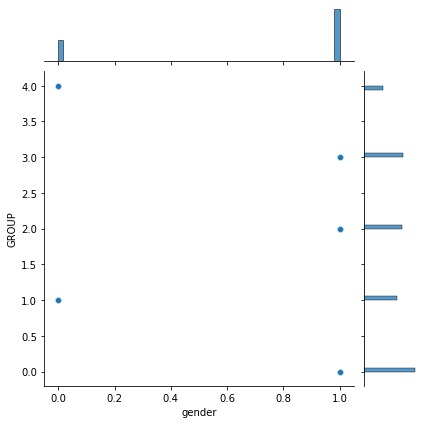

In [59]:
sns.jointplot(df['gender'], df['GROUP'])

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


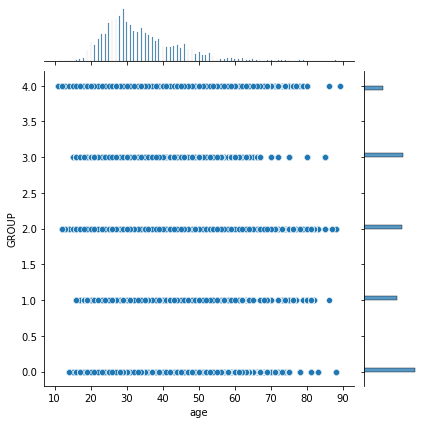

In [60]:
sns.jointplot(df['age'], df['GROUP'])

2 groups female dominated and 3 male

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


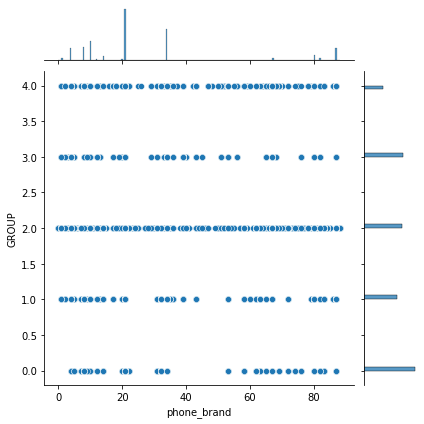

In [61]:
sns.jointplot(df['phone_brand'], df['GROUP'])

groups are spread across different phome brands

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


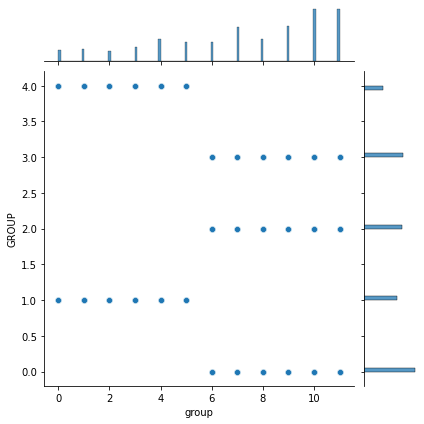

In [82]:
sns.jointplot(df['group'], df['GROUP'])

some device models are grouped specific to a group, so device model is an important dimension

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


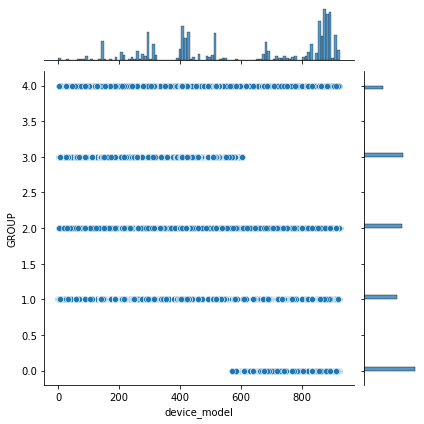

In [83]:
sns.jointplot(df['device_model'], df['GROUP'])

5. Do dimensionality reduction using PCA (5 points)

In [63]:
covMatrix = np.cov(dfScaled,rowvar=False)
print(covMatrix)

[[ 1.00000082  0.94932861  0.05653863  0.00396333  0.05478708 -0.08755324
   0.08174743]
 [ 0.94932861  1.00000082  0.03699908  0.02446335  0.04710737 -0.08994823
   0.07264977]
 [ 0.05653863  0.03699908  1.00000082 -0.03498791  0.85731987  0.04954431
   0.0370289 ]
 [ 0.00396333  0.02446335 -0.03498791  1.00000082  0.41665179 -0.00118856
  -0.01132114]
 [ 0.05478708  0.04710737  0.85731987  0.41665179  1.00000082  0.03245854
   0.02653717]
 [-0.08755324 -0.08994823  0.04954431 -0.00118856  0.03245854  1.00000082
   0.12656661]
 [ 0.08174743  0.07264977  0.0370289  -0.01132114  0.02653717  0.12656661
   1.00000082]]


In [64]:
pca = PCA(n_components=7)
pca.fit(dfScaled)

PCA(n_components=7)

The eigen Values

In [65]:
print(pca.explained_variance_)

[2.05686242 1.86378765 1.13193164 1.01673818 0.8478203  0.05023401
 0.03263153]


The eigen Vectors

In [66]:
print(pca.components_)

[[-5.33823881e-01 -5.29448111e-01 -4.18545420e-01 -1.82224747e-01
  -4.63710356e-01  4.40379756e-02 -9.67677503e-02]
 [-4.51053255e-01 -4.56015436e-01  4.80841493e-01  2.24396391e-01
   5.36313462e-01  1.36692451e-01 -2.68634668e-02]
 [-1.84287461e-02 -4.44427780e-03 -8.78605651e-02  2.99777423e-01
   6.75809961e-02 -6.57821609e-01 -6.81731756e-01]
 [-1.12232674e-03  2.29312333e-02 -4.28657169e-01  8.48834687e-01
   3.34114086e-03  2.17179254e-01  2.19152029e-01]
 [ 1.03893282e-01  1.09832677e-01 -9.41246919e-03 -9.97992196e-03
  -2.13343278e-02  7.06688449e-01 -6.90717785e-01]
 [-7.07372624e-01  7.06427628e-01  3.21641349e-03 -2.00960181e-02
   1.14980828e-02  2.92428361e-04  6.12291800e-03]
 [-8.50311642e-03  9.26372105e-03  6.34070818e-01  3.24884784e-01
  -7.01551753e-01 -8.43107803e-03 -9.76731687e-05]]


And the percentage of variation explained by each eigen Vector

In [67]:
print(pca.explained_variance_ratio_)

[0.29383725 0.26625516 0.16170439 0.14524819 0.12111709 0.00717628
 0.00466164]


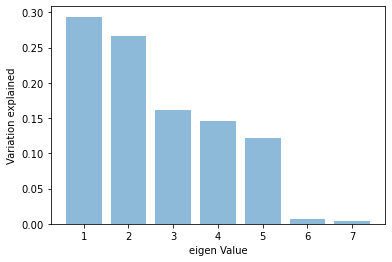

In [68]:
plt.bar(list(range(1,8)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

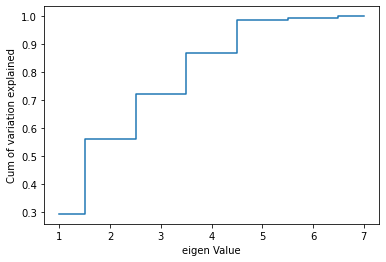

In [69]:
plt.step(list(range(1,8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

first 4,5 components would contribute almost 86% and 98% , so 2 or 3 dimensions can be dropped 
Implemented using 5 principal components

In [73]:
pca5 = PCA(n_components=5)
pca5.fit(dfScaled)
print(pca5.components_)
print(pca5.explained_variance_ratio_)
Xpca5 = pca5.transform(dfScaled)

[[-0.53382388 -0.52944811 -0.41854542 -0.18222475 -0.46371036  0.04403798
  -0.09676775]
 [-0.45105326 -0.45601544  0.48084149  0.22439639  0.53631346  0.13669245
  -0.02686347]
 [-0.01842875 -0.00444428 -0.08786057  0.29977742  0.067581   -0.65782161
  -0.68173176]
 [-0.00112233  0.02293123 -0.42865717  0.84883469  0.00334114  0.21717925
   0.21915203]
 [ 0.10389328  0.10983268 -0.00941247 -0.00997992 -0.02133433  0.70668845
  -0.69071778]]
[0.29383725 0.26625516 0.16170439 0.14524819 0.12111709]


In [79]:
Xpca5

array([[-1.85787457,  0.58255444, -0.39604033,  1.0884135 , -0.37574124],
       [-1.85787457,  0.58255444, -0.39604033,  1.0884135 , -0.37574124],
       [-1.85763538,  0.58276208, -0.39604091,  1.08839863, -0.37579213],
       ...,
       [ 0.52615877,  2.47705848,  2.1912717 ,  0.51383601, -0.03478547],
       [ 1.42825103,  1.67710267, -2.58984606, -0.19319788,  0.61842885],
       [ 3.55451509, -0.92740391, -0.02245672, -0.65881384,  0.46509162]])

6. Apply k means/hierarchical clustering(depending on which you’ve implemented)
on the PCA transformed data (5 points)


In [81]:
Xpca5_df = pd.DataFrame(data = Xpca5)
sampledPcaData = Xpca5_df.sample(n = 10000)
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model.fit(sampledPcaData)
sampledPcaData['labels'] = model.labels_
Xpca5Clust = sampledPcaData.groupby(['labels'])
Z = linkage(sampledPcaData, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(sampledPcaData))

c

0.9051510419630854

7. Mention your comments and findings from clustering profiling (5 points)

The data can be clustered into 5 clusters
Out of the 5 clusters, 3 are male dominated and 2 female
we can find that that certain device models are grouped/clustered in a specific group from the pair plots between device_model and Group
Age groups, device models and gender are important dimensions in forming these clusters
Even after reducing the dimensions from 7 to 5, could still achieve 0.905 cophenet index 